<a href="https://colab.research.google.com/github/gaeun120312/Deeplearning/blob/main/16_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# 라이브러리 호출
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

import sys
import os
import matplotlib.pyplot as plt

(X_train, y_train), (X_test, y_test) = mnist.load_data()

print("학습셋 이미지 수: %d개" % (X_train.shape[0]))
print("테스트셋 이미지 수: %d개" % (X_test.shape[0]))

학습셋 이미지 수: 60000개
테스트셋 이미지 수: 10000개


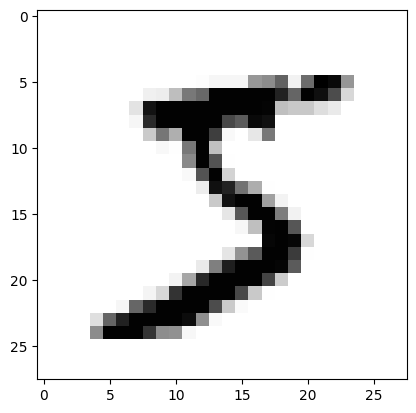

In [ ]:
plt.imshow(X_train[0], cmap='Greys')
plt.show()

In [ ]:
# 이미지 생성
for x in X_train[0]:
  for i in x:
    sys.stdout.write("%-3s" % i)
  sys.stdout.write("\n")

0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  0  0  0  3  18 18 18 12613617526 1662552471270  0  0  0  
0  0  0  0  0  0  0  0  30 36 94 15417025325325325325322517225324219564 0  0  0  0  
0  0  0  0  0  0  0  49 23825325325325325325325325325193 82 82 56 39 0  0  0  0  0  
0  0  0  0  0  0  0  18 2192532532532532531981822472410  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  80 15610725325320511 0  43 1540  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  14 1  15425390 0  0  0  0  0  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  0  0  1392531902  0  0  0  0  0  0  0 

In [ ]:
# 차원 변환 과정 (2차원 -> 1차원)
X_train = X_train.reshape(X_train.shape[0], 784)  # 784=28*28
X_train = X_train.astype('float64')
X_train = X_train / 255
# 정규화 : 흑백 이미지 사진 명도(0~255) -> (실수, 0~1 사이로 변환)

In [ ]:
# train 데이터와 test 데이터 같은 성격데이터로 맞춤
X_test = X_test.reshape(X_test.shape[0], 784).astype('float64') / 255

In [ ]:
# 클래스 값 확인
print("class : %d" % (y_train[0]))

class : 5


In [ ]:
y_train[:5]  # 정답 데이터 정수

array([5, 0, 4, 1, 9], dtype=uint8)

In [ ]:
# 이진화(binary) -> one-hot encoding
y_train = to_categorical(y_train, 10) # to_categorical(시리즈, 클래스 개수)
y_test = to_categorical(y_test, 10)

In [ ]:
print(y_train[0])

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [ ]:
# 딥러닝 기본 프레임 만들기
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.utils import to_categorical

In [ ]:
# 모델 구조 결정
model = Sequential()
model.add(Dense(512, input_dim=784, activation='relu'))  # 입력 28*28, 출력 512
model.add(Dense(10, activation='softmax'))  # 출력 10, 0~9
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 512)               401920    
                                                                 
 dense_3 (Dense)             (None, 10)                5130      
                                                                 
Total params: 407050 (1.55 MB)
Trainable params: 407050 (1.55 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
# 모델 최적화 설정
modelpath = "./MINIST_MLP.hdf5"
checkpointer = ModelCheckpoint(filepath=modelpath, monitor='val_loss', verbose=1, save_best_only=True)
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=10)

history = model.fit(X_train, y_train, validation_split=0.25, epochs=30,
                    batch_size=200, verbose=0, callbacks=[early_stopping_callback, checkpointer])

# 테스트 정확도 출력
print("\n Test Accuracy: %.4f" % (model.evaluate(X_test, y_test)[1]))


Epoch 1: val_loss improved from inf to 0.18939, saving model to ./MINIST_MLP.hdf5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(



Epoch 2: val_loss improved from 0.18939 to 0.13057, saving model to ./MINIST_MLP.hdf5

Epoch 3: val_loss improved from 0.13057 to 0.11061, saving model to ./MINIST_MLP.hdf5

Epoch 4: val_loss improved from 0.11061 to 0.10882, saving model to ./MINIST_MLP.hdf5

Epoch 5: val_loss improved from 0.10882 to 0.10159, saving model to ./MINIST_MLP.hdf5

Epoch 6: val_loss improved from 0.10159 to 0.09296, saving model to ./MINIST_MLP.hdf5

Epoch 7: val_loss improved from 0.09296 to 0.08660, saving model to ./MINIST_MLP.hdf5

Epoch 8: val_loss did not improve from 0.08660

Epoch 9: val_loss improved from 0.08660 to 0.08344, saving model to ./MINIST_MLP.hdf5

Epoch 10: val_loss did not improve from 0.08344

Epoch 11: val_loss did not improve from 0.08344

Epoch 12: val_loss improved from 0.08344 to 0.08145, saving model to ./MINIST_MLP.hdf5

Epoch 13: val_loss did not improve from 0.08145

Epoch 14: val_loss did not improve from 0.08145

Epoch 15: val_loss did not improve from 0.08145

Epoch 16:

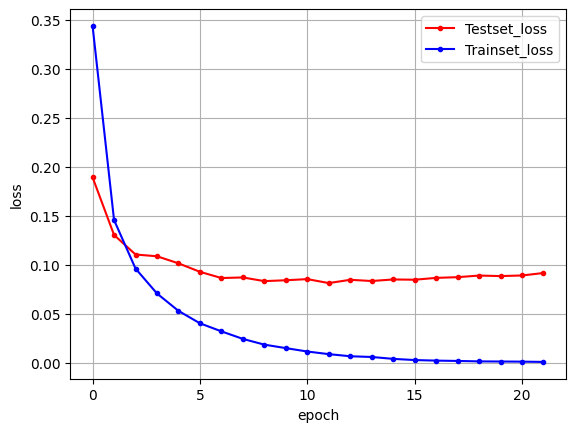

In [ ]:
# 그래프 표현
import numpy as np

y_vloss = history.history['val_loss']
y_loss = history.history['loss']

x_len = np.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker='.', c="red", label="Testset_loss")
plt.plot(x_len, y_loss, marker='.', c="blue", label="Trainset_loss")

plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

In [2]:
# CNN
from tensorflow.keras.layers import Dense, Conv2D, Flatten, MaxPooling2D, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import mnist

import matplotlib.pyplot as plt
import numpy as np

(X_train, y_train), (X_test, y_test) = mnist.load_data()

# 모델 input_shape(가로,세로,채널)로 맞추기 -> reshape(데이터개수,가로,세로,채널)
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1).astype('float32') / 255
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1).astype('float32') / 255

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

model = Sequential()
model.add(Conv2D(32, kernel_size=(3,3), input_shape=(28,28,1), activation='relu'))
model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Flatten())  # 2차원 데이터 -> 1차원으로 변환
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))
model.summary()

## I:입력 FeatureMap 크기
## F:Filter 크기(kernel size)
## P:Padding(정수): 모서리 채우기, 1이면 4x4
## S:Strides(정수): 보폭
## O = (I - F + 2P)/S + 1 = (28 - 3 + 2*0) / 1 + 1 = I-F+1 = 28-3+1 = 26

11490434/11490434 [==============================] - 0s 0us/step
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 64)        18496     
                                                                 
 max_pooling2d (MaxPooling2  (None, 12, 12, 64)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 12, 12, 64)        0         
                                                                 
 flatten (Flatten)           (None, 9216)              0         
                                                                 
 dense (Dense)               (None, 128)               11

In [3]:
# 모델 컴파일
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# 모델 최적화 설정
modelpath = "./MINIST_CNN.hdf5"
checkpointer = ModelCheckpoint(filepath=modelpath, monitor='val_loss', verbose=1, save_best_only=True)
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=10)

history = model.fit(X_train, y_train, validation_split=0.25, epochs=30,
                    batch_size=200, verbose=0, callbacks=[early_stopping_callback, checkpointer])

# 테스트 정확도 출력
print("\n Test Accuracy: %.4f" % (model.evaluate(X_test, y_test)[1]))


Epoch 1: val_loss improved from inf to 0.07789, saving model to ./MINIST_CNN.hdf5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(



Epoch 2: val_loss improved from 0.07789 to 0.05299, saving model to ./MINIST_CNN.hdf5

Epoch 3: val_loss improved from 0.05299 to 0.04740, saving model to ./MINIST_CNN.hdf5

Epoch 4: val_loss improved from 0.04740 to 0.04655, saving model to ./MINIST_CNN.hdf5

Epoch 5: val_loss improved from 0.04655 to 0.04180, saving model to ./MINIST_CNN.hdf5

Epoch 6: val_loss did not improve from 0.04180

Epoch 7: val_loss did not improve from 0.04180

Epoch 8: val_loss improved from 0.04180 to 0.04134, saving model to ./MINIST_CNN.hdf5

Epoch 9: val_loss improved from 0.04134 to 0.04101, saving model to ./MINIST_CNN.hdf5

Epoch 10: val_loss improved from 0.04101 to 0.03895, saving model to ./MINIST_CNN.hdf5

Epoch 11: val_loss did not improve from 0.03895

Epoch 12: val_loss did not improve from 0.03895

Epoch 13: val_loss improved from 0.03895 to 0.03773, saving model to ./MINIST_CNN.hdf5

Epoch 14: val_loss did not improve from 0.03773

Epoch 15: val_loss did not improve from 0.03773

Epoch 16:

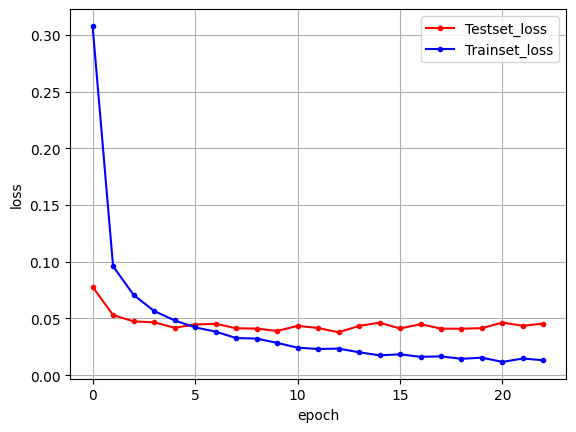

In [4]:
y_vloss = history.history['val_loss']
y_loss = history.history['loss']

x_len = np.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker='.', c="red", label="Testset_loss")
plt.plot(x_len, y_loss, marker='.', c="blue", label="Trainset_loss")

plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()